In [7]:
import pandas as pd
import sqlite3

In [8]:
# Reconnect to the IMDB SQLite database
with sqlite3.connect('im.db') as conn:


    # Extract schema data from sqlite_master
    tables_info = conn.execute("SELECT * FROM sqlite_master").fetchall()

# Print the schema details
for table in tables_info:
    print(table)

('table', 'movie_basics', 'movie_basics', 2, 'CREATE TABLE "movie_basics" (\n"movie_id" TEXT,\n  "primary_title" TEXT,\n  "original_title" TEXT,\n  "start_year" INTEGER,\n  "runtime_minutes" REAL,\n  "genres" TEXT\n)')
('table', 'directors', 'directors', 3, 'CREATE TABLE "directors" (\n"movie_id" TEXT,\n  "person_id" TEXT\n)')
('table', 'known_for', 'known_for', 4, 'CREATE TABLE "known_for" (\n"person_id" TEXT,\n  "movie_id" TEXT\n)')
('table', 'movie_akas', 'movie_akas', 5, 'CREATE TABLE "movie_akas" (\n"movie_id" TEXT,\n  "ordering" INTEGER,\n  "title" TEXT,\n  "region" TEXT,\n  "language" TEXT,\n  "types" TEXT,\n  "attributes" TEXT,\n  "is_original_title" REAL\n)')
('table', 'movie_ratings', 'movie_ratings', 6, 'CREATE TABLE "movie_ratings" (\n"movie_id" TEXT,\n  "averagerating" REAL,\n  "numvotes" INTEGER\n)')
('table', 'persons', 'persons', 7, 'CREATE TABLE "persons" (\n"person_id" TEXT,\n  "primary_name" TEXT,\n  "birth_year" REAL,\n  "death_year" REAL,\n  "primary_profession" TE

In [9]:
# Connect to the SQLite database
with sqlite3.connect('im.db') as conn:
    movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
    directors = pd.read_sql_query("SELECT * FROM directors", conn)
    known_for = pd.read_sql_query("SELECT * FROM known_for", conn)
    movie_akas = pd.read_sql_query("SELECT * FROM movie_akas", conn)
    movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
    persons = pd.read_sql_query("SELECT * FROM persons", conn)
    principals = pd.read_sql_query("SELECT * FROM principals", conn)
    writers = pd.read_sql_query("SELECT * FROM writers", conn)

# Confirm data is loaded
print("Tables loaded successfully!")

Tables loaded successfully!


In [10]:
# Load the Box Office Mojo dataset
bom_movie_gross_df = pd.read_csv('bom.movie_gross.csv.gz')

# Load Rotten Tomatoes movie info
rt_movie_info_df = pd.read_csv('rt.movie_info.tsv.gz', sep='\t')

# Load Rotten Tomatoes reviews
rt_reviews_df = pd.read_csv('rt.reviews.tsv.gz', sep='\t', encoding='ISO-8859-1')

# Load TMDB movies dataset
tmdb_movies_df = pd.read_csv('tmdb.movies.csv.gz')

# Load The Numbers movie budgets dataset
the_numbers_df = pd.read_csv('tn.movie_budgets.csv.gz')


In [18]:
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [11]:
# Check IMDB tables
print("IMDB movie_basics:")
print(movie_basics.head(), "\n")
print("IMDB movie_ratings:")
print(movie_ratings.head(), "\n")

# Check other datasets
print("Box Office Mojo:")
print(bom_movie_gross_df.head(), "\n")
print("Rotten Tomatoes Movie Info:")
print(rt_movie_info_df.head(), "\n")
print("Rotten Tomatoes Reviews:")
print(rt_reviews_df.head(), "\n")
print("TMDB Movies:")
print(tmdb_movies_df.head(), "\n")
print("The Numbers Budgets:")
print(the_numbers_df.head(), "\n")


IMDB movie_basics:
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy   

IMDB movie_ratings:
     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043

In [12]:
import pandas as pd

# 1. Clean IMDB Data
movie_basics['primary_title'] = movie_basics['primary_title'].str.lower()
movie_basics['genres'] = movie_basics['genres'].str.split(',')
movie_basics['runtime_minutes'] = movie_basics['runtime_minutes'].fillna(movie_basics['runtime_minutes'].median())

movie_ratings['movie_id'] = movie_ratings['movie_id'].str.strip()

# 2. Clean Box Office Mojo Data
bom_movie_gross_df['title'] = bom_movie_gross_df['title'].str.lower()
bom_movie_gross_df['foreign_gross'] = bom_movie_gross_df['foreign_gross'].replace('[\$,]', '', regex=True)
bom_movie_gross_df['foreign_gross'] = pd.to_numeric(bom_movie_gross_df['foreign_gross'], errors='coerce')

# 3. Clean Rotten Tomatoes Data
rt_movie_info_df['genre'] = rt_movie_info_df['genre'].str.lower()
rt_movie_info_df['runtime'] = rt_movie_info_df['runtime'].str.replace(' minutes', '', regex=False).astype(float)

# 4. Clean TMDB Data
tmdb_movies_df['title'] = tmdb_movies_df['title'].str.lower()
tmdb_movies_df['release_date'] = pd.to_datetime(tmdb_movies_df['release_date'])
tmdb_movies_df['release_year'] = tmdb_movies_df['release_date'].dt.year

# 5. Clean The Numbers Data
the_numbers_df['movie'] = the_numbers_df['movie'].str.lower()
the_numbers_df['production_budget'] = the_numbers_df['production_budget'].replace('[\$,]', '', regex=True).astype(float)
the_numbers_df['domestic_gross'] = the_numbers_df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
the_numbers_df['worldwide_gross'] = the_numbers_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

print("Data cleaning completed!")


Data cleaning completed!


In [13]:
merged_df = pd.merge(movie_basics, movie_ratings, on='movie_id', how='left')
merged_df = pd.merge(merged_df, bom_movie_gross_df, left_on='primary_title', right_on='title', how='left')


In [15]:
merged_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0063540,sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77.0,NaN,NaN,NaN,NaN,NaN
1,tt0066787,one day before the rainy season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",7.2,43.0,NaN,NaN,NaN,NaN,NaN
2,tt0069049,the other side of the wind,The Other Side of the Wind,2018,122.0,[Drama],6.9,4517.0,NaN,NaN,NaN,NaN,NaN
3,tt0069204,sabse bada sukh,Sabse Bada Sukh,2018,87.0,"[Comedy, Drama]",6.1,13.0,NaN,NaN,NaN,NaN,NaN
4,tt0100275,the wandering soap opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]",6.5,119.0,NaN,NaN,NaN,NaN,NaN


In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146146 entries, 0 to 146145
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146146 non-null  object 
 1   primary_title    146146 non-null  object 
 2   original_title   146125 non-null  object 
 3   start_year       146146 non-null  int64  
 4   runtime_minutes  146146 non-null  float64
 5   genres           140738 non-null  object 
 6   averagerating    73858 non-null   float64
 7   numvotes         73858 non-null   float64
 8   title            3487 non-null    object 
 9   studio           3484 non-null    object 
 10  domestic_gross   3462 non-null    float64
 11  foreign_gross    2106 non-null    float64
 12  year             3487 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 14.5+ MB


In [14]:
merged_df.describe()


,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
count,146146.000000,146146.000000,73858.000000,7.385800e+04,3.462000e+03,2.106000e+03,3487.000000
mean,2014.621796,86.364047,6.332726,3.523584e+03,2.968458e+07,7.395034e+07,2014.073129
std,2.733580,147.190668,1.474959,3.029362e+04,6.482143e+07,1.337130e+08,2.443765
min,2010.000000,1.000000,1.000000,5.000000e+00,1.000000e+02,6.000000e+02,2010.000000
25%,2012.000000,75.000000,5.500000,1.400000e+01,1.415000e+05,4.525000e+06,2012.000000
50%,2015.000000,87.000000,6.500000,4.900000e+01,2.000000e+06,1.970000e+07,2014.000000
75%,2017.000000,95.000000,7.400000,2.820000e+02,3.140000e+07,7.645000e+07,2016.000000
max,2115.000000,51420.000000,10.000000,1.841066e+06,7.001000e+08,9.464000e+08,2018.000000


1. Handling Missing Values
Missing Data in domestic_gross, foreign_gross, and averagerating
For domestic_gross and foreign_gross: These could be missing if a movie has not been released in certain regions or has not been recorded on Box Office Mojo.

Option 1: Fill the missing values with 0, assuming that missing values indicate no revenue from these regions.
Option 2: Fill missing values using the median or mean of the existing data to minimize the effect of outliers.

In [19]:
merged_df['domestic_gross'] = merged_df['domestic_gross'].fillna(0)  # or use median() instead of 0
merged_df['foreign_gross'] = merged_df['foreign_gross'].fillna(0)    # or use median()
merged_df['averagerating'] = merged_df['averagerating'].fillna(merged_df['averagerating'].median())



For year and start_year: If start_year is missing, it could be a placeholder for unknown years. Consider filling it with the median or mode of the start_year column.

In [20]:
merged_df['start_year'] = merged_df['start_year'].fillna(merged_df['start_year'].mode()[0])


Missing runtime_minutes:
For runtime_minutes, you can fill missing values with the median runtime, as you did earlier, which is a good approach when dealing with continuous data with outliers.

In [21]:
merged_df['runtime_minutes'] = merged_df['runtime_minutes'].fillna(merged_df['runtime_minutes'].median())


In [22]:
outliers = merged_df[merged_df['runtime_minutes'] > 300]  # Anything over 5 hours (300 minutes)
print(outliers)


          movie_id                     primary_title  \
3799    tt10366986               3 games to glory vi   
4374    tt10407026            serious serial killers   
6311     tt1277455                    a time to stir   
7901     tt1464590         the weathered underground   
12974    tt1674154            city of eternal spring   
...            ...                               ...   
139793   tt9047474                           la flor   
141173   tt9195252                            report   
143484   tt9534772  kid fights from around the world   
143605   tt9552194           the freshman experience   
144953   tt9743020           beauty lives in freedom   

                          original_title  start_year  runtime_minutes  \
3799                 3 Games to Glory VI        2019            350.0   
4374              Serious Serial Killers        2012            388.0   
6311                      A Time to Stir        2018           1320.0   
7901           The Weathered Underg

Removing or Correcting the Outlier: If it’s an error, you can either remove the row or set the value to a reasonable default, like the median runtime.

In [23]:
merged_df['runtime_minutes'] = merged_df['runtime_minutes'].apply(lambda x: x if x <= 300 else merged_df['runtime_minutes'].median())


In [24]:
print(merged_df.isnull().sum())


movie_id                0
primary_title           0
original_title         21
start_year              0
runtime_minutes         0
genres               5408
averagerating           0
numvotes            72288
title              142659
studio             142662
domestic_gross          0
foreign_gross           0
year               142659
dtype: int64


Fill the missing values with the primary_title

In [25]:
merged_df['original_title'] = merged_df['original_title'].fillna(merged_df['primary_title'])


You can fill missing genres with a placeholder (like unknown),

In [26]:
merged_df['genres'] = merged_df['genres'].fillna('unknown')


You can fill missing numvotes with 0 (if no votes were cast for a movie)

In [27]:
merged_df['numvotes'] = merged_df['numvotes'].fillna(0)


This is a critical column. You can fill missing titles with a placeholder ('unknown')

In [28]:
merged_df['title'] = merged_df['title'].fillna('unknown')


For the studio column, you can fill missing values with 'unknown'

In [29]:
merged_df['studio'] = merged_df['studio'].fillna('unknown')


If year is missing, you can fill it with the start_year column.

In [30]:
merged_df['year'] = merged_df['year'].fillna(merged_df['start_year'])


Re-check Missing Values

In [31]:
print(merged_df.isnull().sum())


movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
title              0
studio             0
domestic_gross     0
foreign_gross      0
year               0
dtype: int64


In [32]:
merged_df.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
146141,tt9916538,kuambil lagi hatiku,Kuambil Lagi Hatiku,2019,123.0,[Drama],6.5,0.0,unknown,unknown,0.0,0.0,2019.0
146142,tt9916622,rodolpho teóphilo - o legado de um pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,[Documentary],6.5,0.0,unknown,unknown,0.0,0.0,2015.0
146143,tt9916706,dankyavar danka,Dankyavar Danka,2013,87.0,[Comedy],6.5,0.0,unknown,unknown,0.0,0.0,2013.0
146144,tt9916730,6 gunn,6 Gunn,2017,116.0,unknown,6.5,0.0,unknown,unknown,0.0,0.0,2017.0
146145,tt9916754,chico albuquerque - revelações,Chico Albuquerque - Revelações,2013,87.0,[Documentary],6.5,0.0,unknown,unknown,0.0,0.0,2013.0


       runtime_minutes  averagerating  domestic_gross
count    146146.000000  146146.000000    1.461460e+05
mean         85.244454       6.415465    7.031873e+05
std          24.969065       1.051867    1.094928e+07
min           1.000000       1.000000    0.000000e+00
25%          75.000000       6.500000    0.000000e+00
50%          87.000000       6.500000    0.000000e+00
75%          95.000000       6.500000    0.000000e+00
max         300.000000      10.000000    7.001000e+08


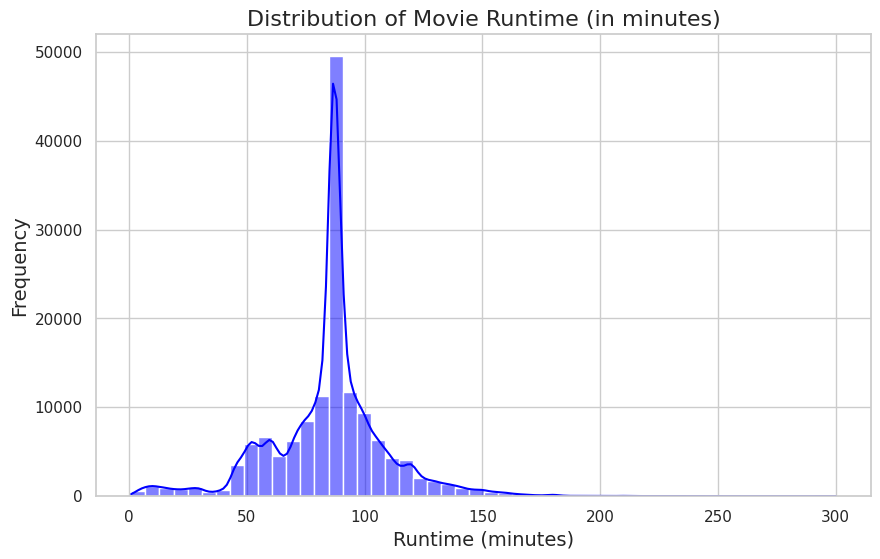

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for key numerical features
summary_stats = merged_df[['runtime_minutes', 'averagerating', 'domestic_gross']].describe()
print(summary_stats)

# Set up the plotting style
sns.set(style="whitegrid")

# 1. Histogram for Runtime Minutes
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['runtime_minutes'], bins=50, kde=True, color='blue')
plt.title('Distribution of Movie Runtime (in minutes)', fontsize=16)
plt.xlabel('Runtime (minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

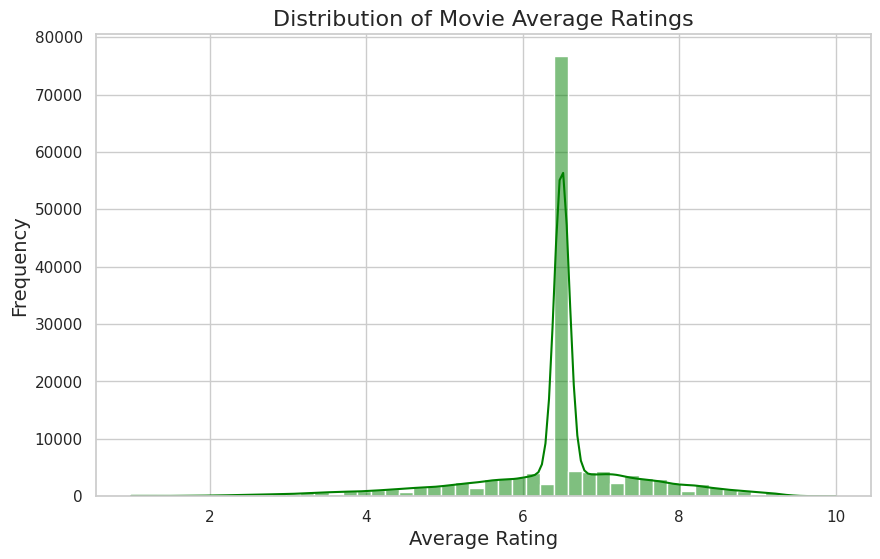

In [35]:
# 2. Histogram for Average Rating
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['averagerating'], bins=50, kde=True, color='green')
plt.title('Distribution of Movie Average Ratings', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

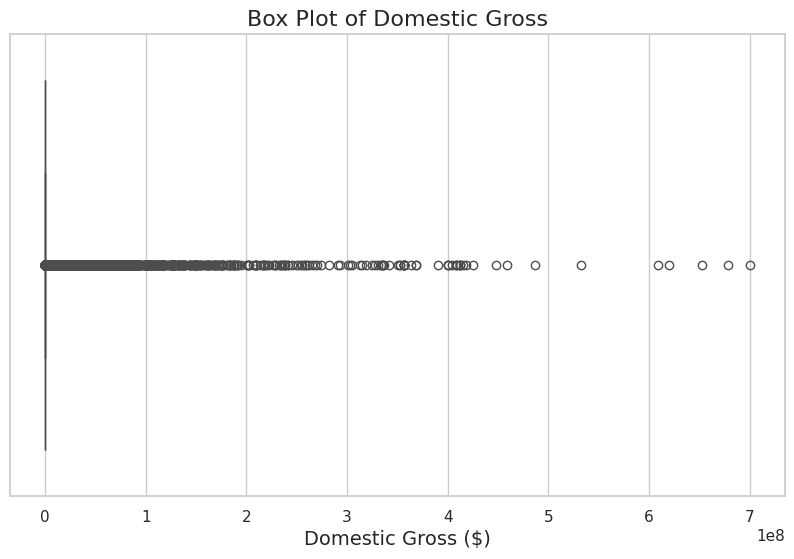

In [36]:
# 3. Box plot for Domestic Gross
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['domestic_gross'], color='orange')
plt.title('Box Plot of Domestic Gross', fontsize=16)
plt.xlabel('Domestic Gross ($)', fontsize=14)
plt.show()

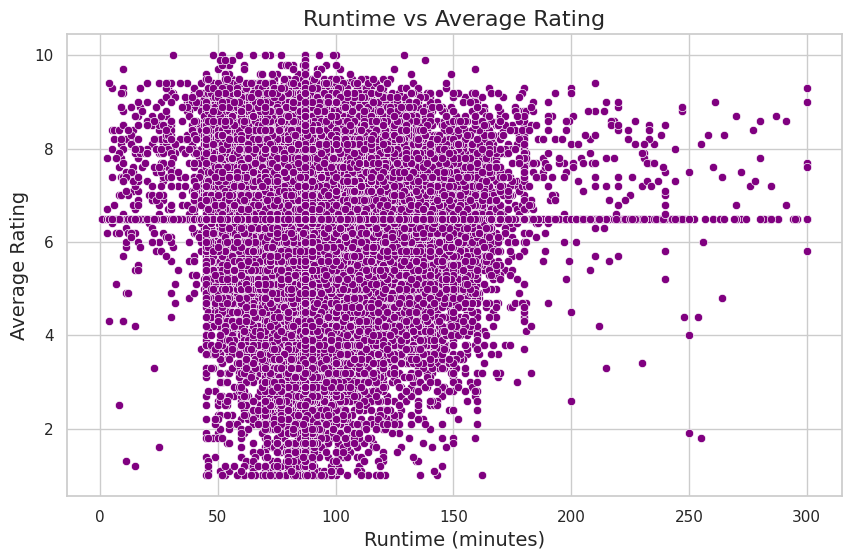

In [37]:
# 4. Scatter plot for Runtime vs Average Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['runtime_minutes'], y=merged_df['averagerating'], color='purple')
plt.title('Runtime vs Average Rating', fontsize=16)
plt.xlabel('Runtime (minutes)', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.show()


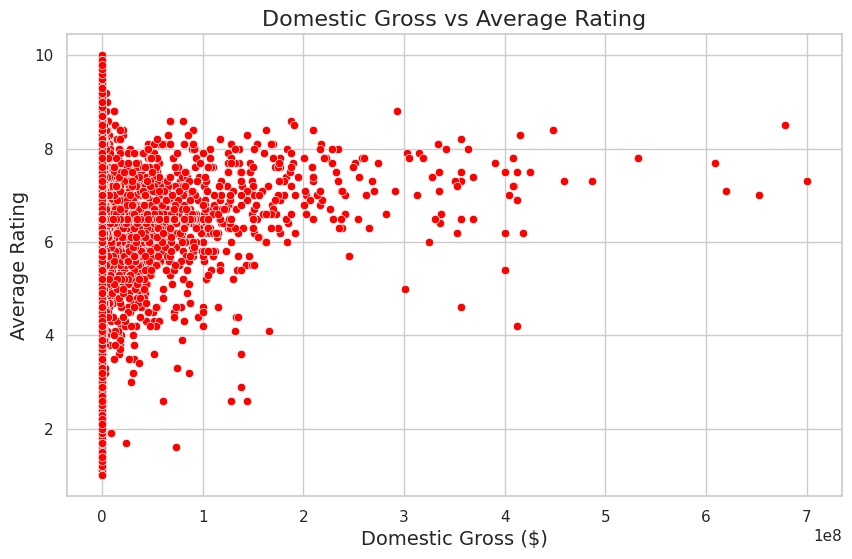

In [38]:
# 5. Scatter plot for Domestic Gross vs Average Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['domestic_gross'], y=merged_df['averagerating'], color='red')
plt.title('Domestic Gross vs Average Rating', fontsize=16)
plt.xlabel('Domestic Gross ($)', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.show()

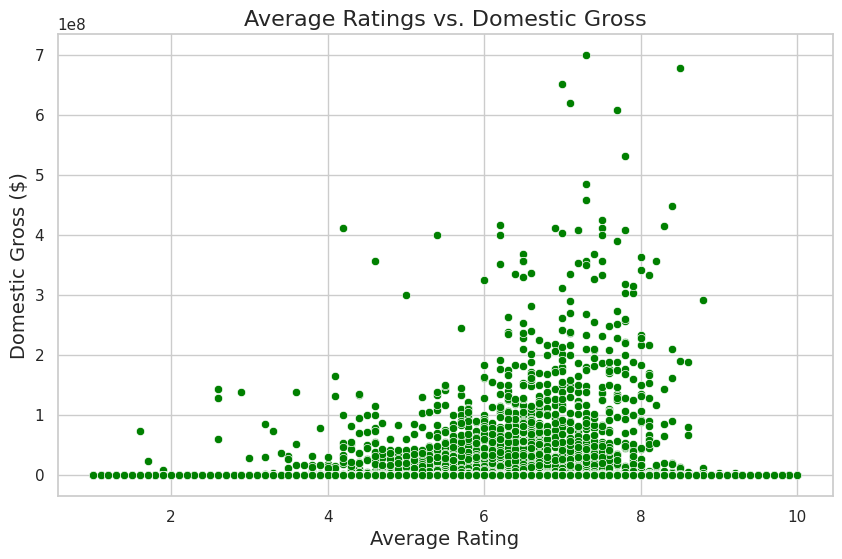

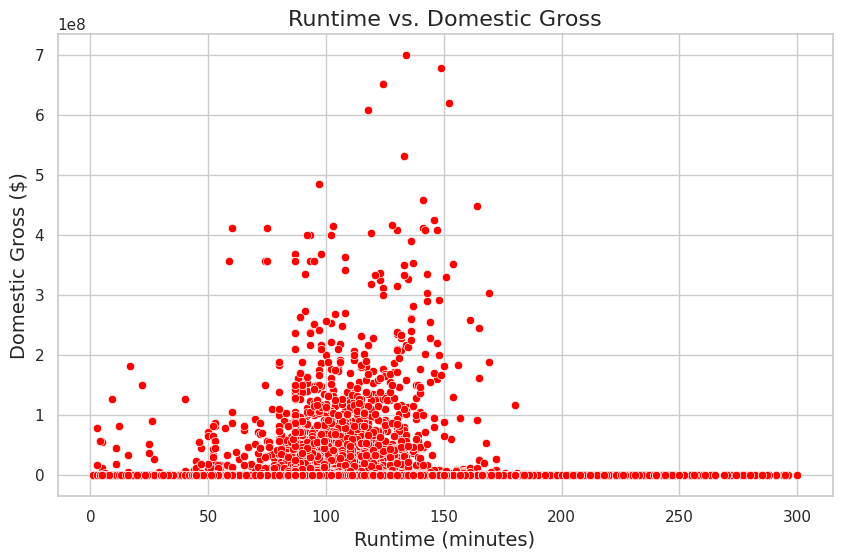

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")



# 3. Scatter Plot: Average Ratings vs. Domestic Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='averagerating', y='domestic_gross', color='green')
plt.title('Average Ratings vs. Domestic Gross', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Domestic Gross ($)', fontsize=14)
plt.show()


# 6. Scatter Plot: Runtime vs. Domestic Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='runtime_minutes', y='domestic_gross', color='red')
plt.title('Runtime vs. Domestic Gross', fontsize=16)
plt.xlabel('Runtime (minutes)', fontsize=14)
plt.ylabel('Domestic Gross ($)', fontsize=14)
plt.show()


<ipython-input-40-eebc2493b521>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_gross.index, y=genre_gross.values, palette='viridis')


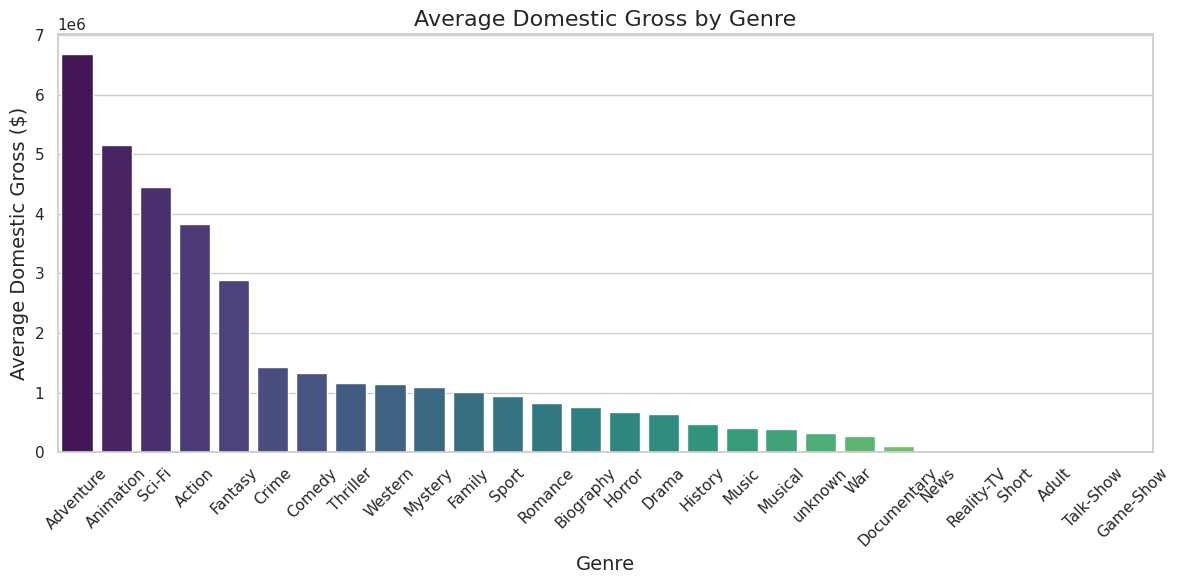

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `merged_df` is your dataset.

# 1. Analyze Genre Performance
genre_gross = merged_df.explode('genres').groupby('genres')['domestic_gross'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_gross.index, y=genre_gross.values, palette='viridis')
plt.title('Average Domestic Gross by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Domestic Gross ($)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-41-edf3416b86c7>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runtime_avg = merged_df.groupby(runtime_bins)['averagerating'].mean()


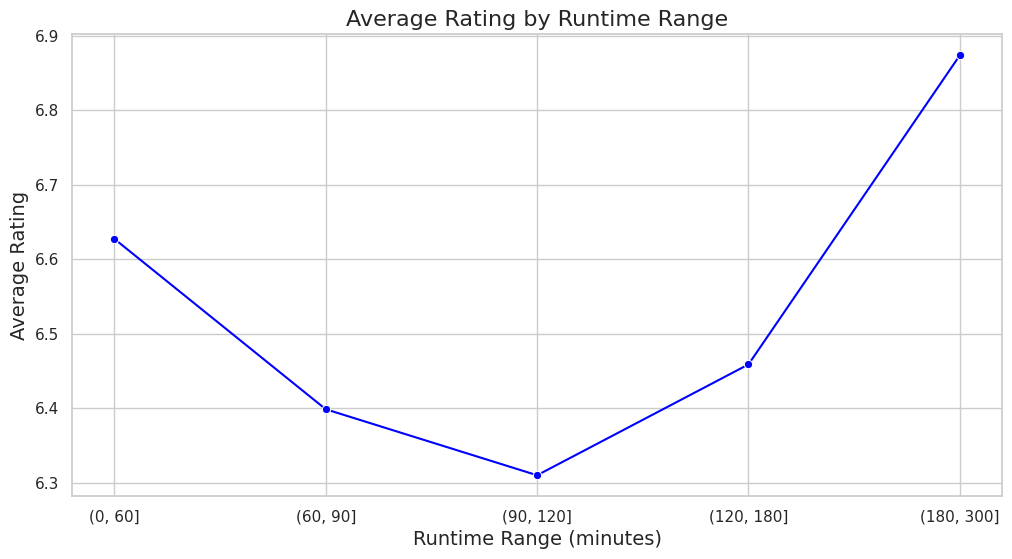

In [41]:
# 2. Optimize Movie Runtime
runtime_bins = pd.cut(merged_df['runtime_minutes'], bins=[0, 60, 90, 120, 180, 300])
runtime_avg = merged_df.groupby(runtime_bins)['averagerating'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=runtime_avg.index.astype(str), y=runtime_avg.values, marker='o', color='blue')
plt.title('Average Rating by Runtime Range', fontsize=16)
plt.xlabel('Runtime Range (minutes)', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.show()

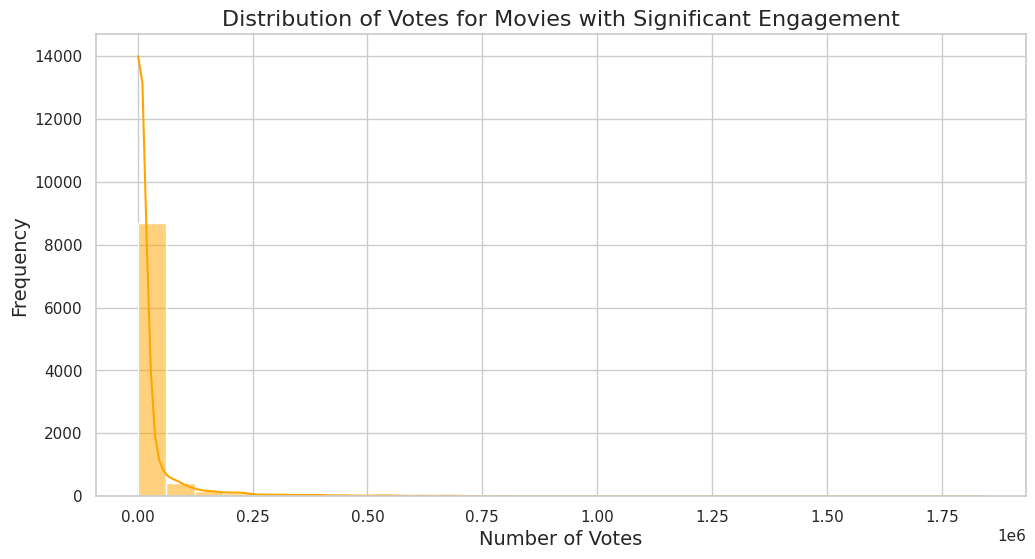

In [42]:
# 4. Audience Votes as Popularity Proxy
high_vote_movies = merged_df[merged_df['numvotes'] > 1000]
plt.figure(figsize=(12, 6))
sns.histplot(high_vote_movies['numvotes'], bins=30, kde=True, color='orange')
plt.title('Distribution of Votes for Movies with Significant Engagement', fontsize=16)
plt.xlabel('Number of Votes', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

<ipython-input-43-c1ae723abb1a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_revenue = merged_df.groupby(pd.cut(merged_df['averagerating'], bins=[0, 5, 7, 10]))['domestic_gross'].mean()
<ipython-input-43-c1ae723abb1a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_revenue.index.astype(str), y=rating_revenue.values, palette='coolwarm')


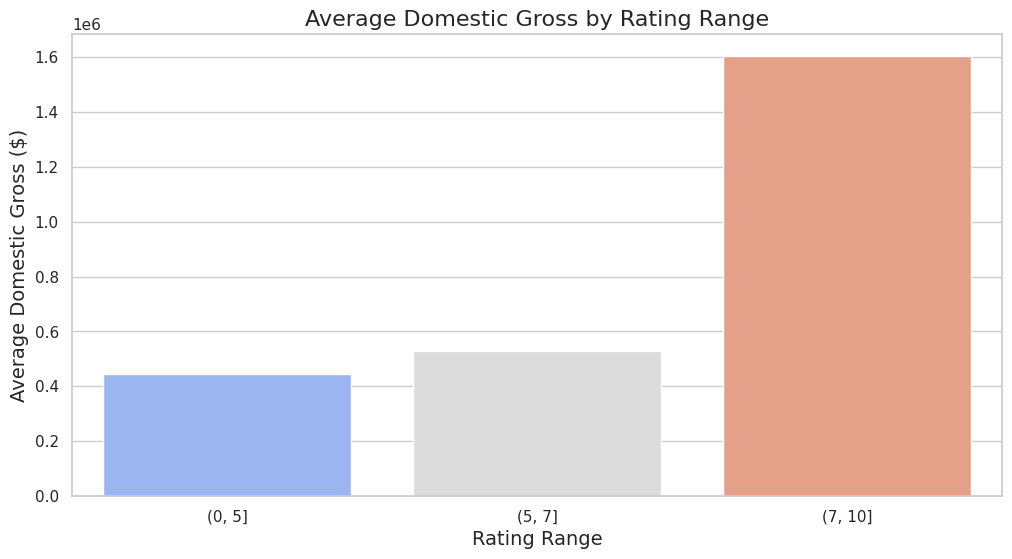

In [43]:
# 5. Revenue by Rating Threshold
rating_revenue = merged_df.groupby(pd.cut(merged_df['averagerating'], bins=[0, 5, 7, 10]))['domestic_gross'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=rating_revenue.index.astype(str), y=rating_revenue.values, palette='coolwarm')
plt.title('Average Domestic Gross by Rating Range', fontsize=16)
plt.xlabel('Rating Range', fontsize=14)
plt.ylabel('Average Domestic Gross ($)', fontsize=14)
plt.show()